<a href="https://colab.research.google.com/github/arkaseth/Math-and-stat-for-ML/blob/main/DataNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Z-score

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
## create data

data = np.random.poisson(3, 1000) ** 2

In [ ]:
# compute mean and std dev
datamean = np.mean(data)
datastd = np.std(data, ddof=1)

In [ ]:
# data.mean()
# data.std(ddof=1)

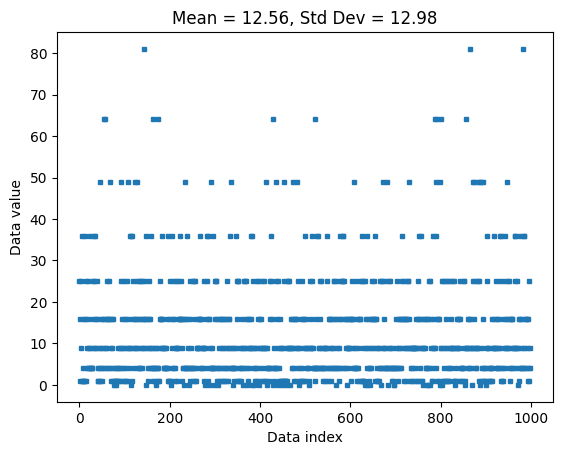

In [ ]:
plt.plot(data, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {datamean:.2f}, Std Dev = {datastd:.2f}")
plt.show()

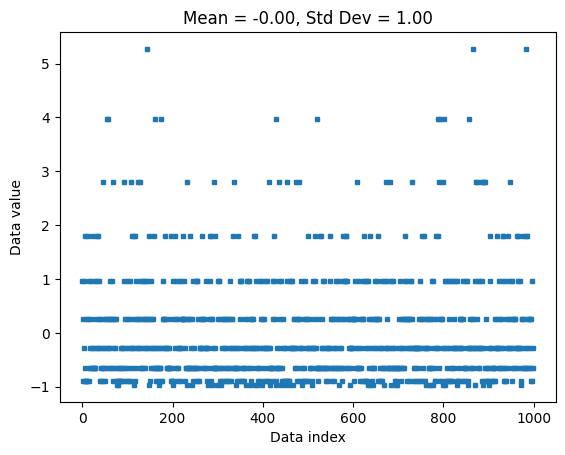

In [ ]:
# Z-transform the data

zscore = (data - datamean) / datastd

dataz = stats.zscore(data)

dataZmean = np.mean(dataz)
dataZstd = np.std(dataz, ddof=1)

plt.plot(dataz, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {dataZmean:.2f}, Std Dev = {dataZstd:.2f}")

plt.show()

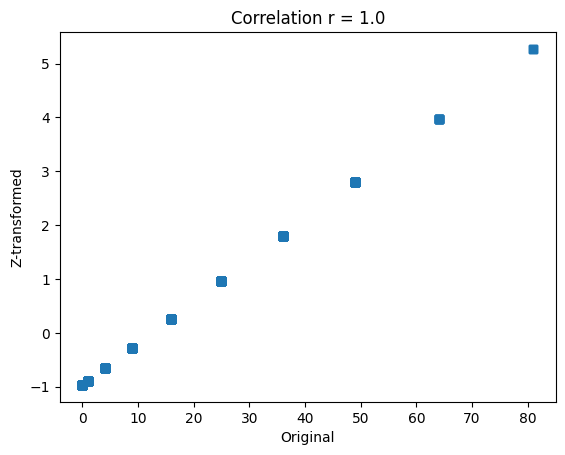

In [ ]:
## relative values are preserved -> shape does not change

plt.plot(data, dataz, 's')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title(f"Correlation r = {np.corrcoef(data,dataz)[0,0]}")
plt.show()

## Min-Max scaling

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

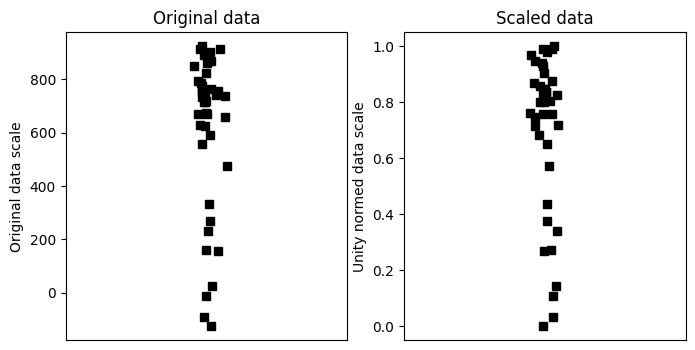

In [ ]:
N = 42
data = np.log(np.random.rand(N)) * 234 + 934

dataMin = np.min(data)
dataMax = np.max(data)

dataS = (data-dataMin)/(dataMax-dataMin)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks') # x-axis shift
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity normed data scale')
ax[1].set_title('Scaled data')

plt.show()

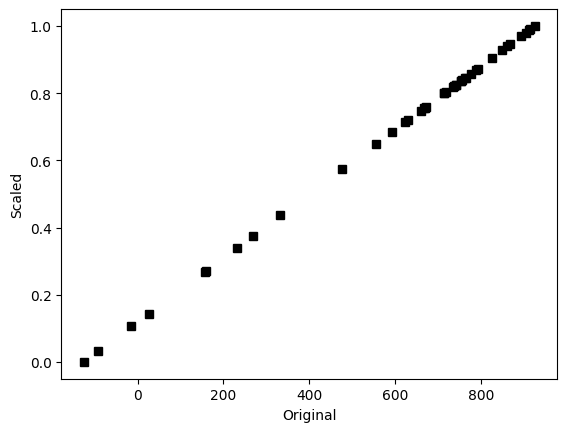

In [ ]:
# scaling does not affect relative values

plt.plot(data, dataS, 'ks')
plt.ylabel('Scaled')
plt.xlabel('Original')

plt.show()

In [ ]:
## scaling data to arbitrary range

# step 1: normalize to [0,1] as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS * (newMax-newMin) + newMin

print([min(dataSS), max(dataSS)])

[np.float64(4.0), np.float64(8.7)]


## Assignment: Invert min-max scaling

In [ ]:
recoveredData = dataMin + ((dataMax-dataMin)*(dataSS-newMin)/(newMax-newMin))

print(np.stack([recoveredData[:5], data[:5]]))

[[913.77800701 752.43478623 775.73538733 762.92658894 718.05358849]
 [913.77800701 752.43478623 775.73538733 762.92658894 718.05358849]]


## Z-score for outlier removal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels import robust

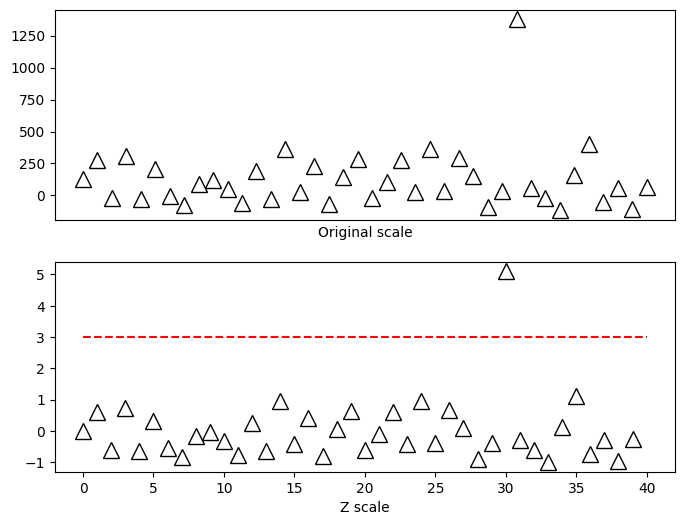

In [4]:
## create data

N = 40
data = np.random.randn(N)

# add outliers
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2]**2

data = data*200+50 # change scale

dataZ = stats.zscore(data)

zscorethresh = 3

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(dataZ, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_xlabel('Z scale')

plt.show()

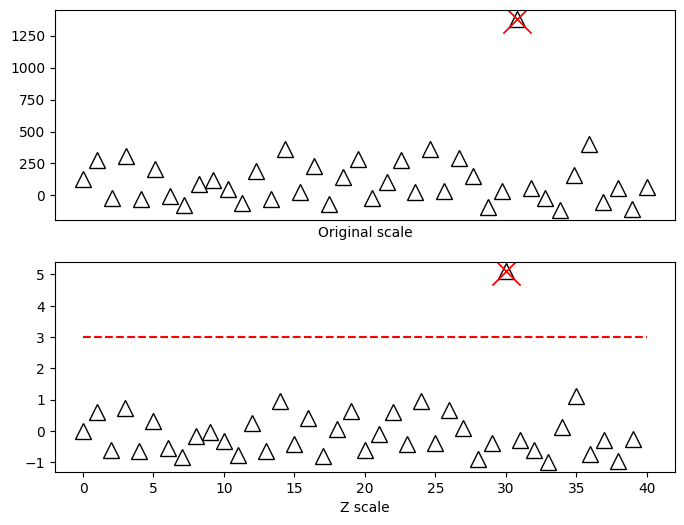

In [7]:
## identify outliers

outliers = np.where(np.abs(dataZ)>zscorethresh)[0]

# cross them out
ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, dataZ[outliers], 'x', color='r', markersize=20)

fig

In [8]:
## two options:

# 1. Replace data with NaN - preserves shape
# 2. Remove from dataset - changes shape

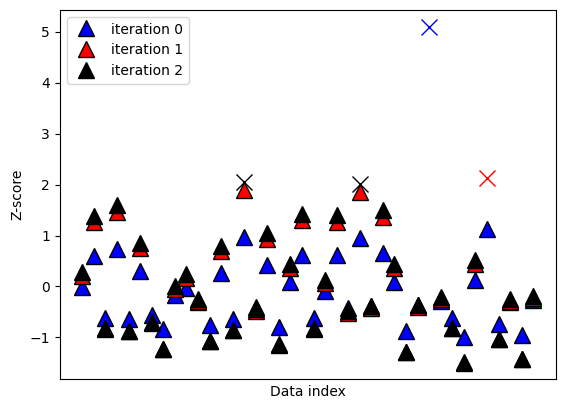

[14 24 30 35]


In [11]:
## iterative method

zscorethresh = 2 # too lenient in practice
dataZ = (data - np.mean(data)) / np.std(data)

colorz = 'brkm'
numiters = 0

while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd = np.nanstd(dataZ)
  dataZ = (dataZ - datamean) / datastd

  # find data values to remove
  toremove = dataZ > zscorethresh

  if sum(toremove) == 0:
    break

  plt.plot(np.where(toremove)[0], dataZ[toremove], '%sx'%colorz[numiters], markersize=12)
  dataZ[toremove] = np.nan

  plt.plot(dataZ, 'k^', markersize=12, markerfacecolor=colorz[numiters], label=f'iteration {numiters}')
  numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()


removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

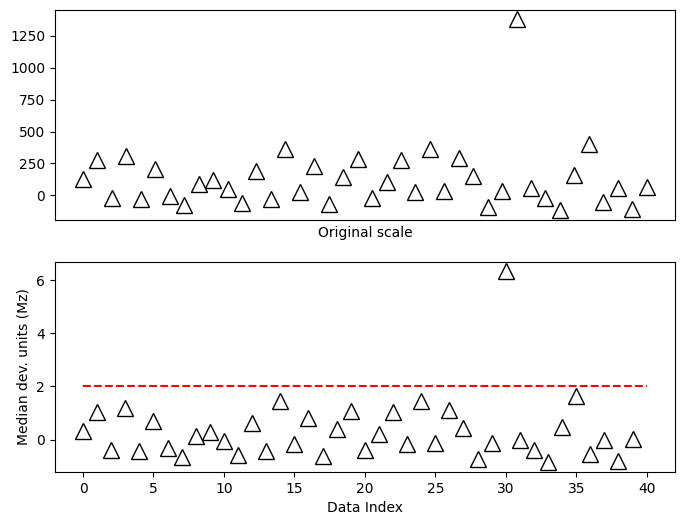

In [13]:
## modified Z for non-normal distributions

dataMed = np.median(data)
dataMad = robust.mad(data)

dataMz = 0.6745 * (data - dataMed) / dataMad
# dataMz = stats.norm.ppf(.75) * (data - dataMed) / dataMad

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(dataMz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()

## Assignment

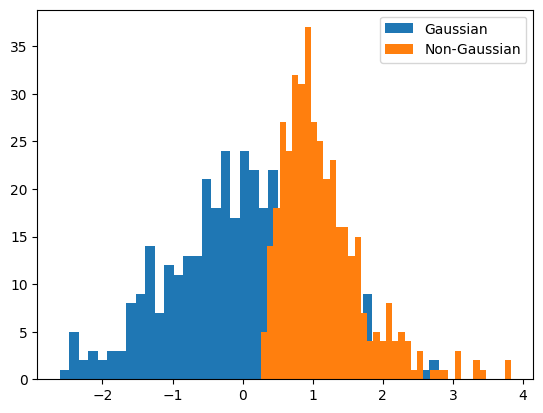

In [22]:
N = 400

data1 = np.random.randn(N)

data2 = np.exp(np.random.randn(N)*0.5)

plt.hist(data1,40,label='Gaussian')
plt.hist(data2,40,label='Non-Gaussian')
plt.legend()
plt.show()

In [23]:
# z-score
data1Z = (data1-np.mean(data1))/np.std(data1)
data2Z = (data2-np.mean(data2))/np.std(data2)

# modified z-score
data1Med = np.median(data1)
data1Mad = robust.mad(data1)
data1Mz = stats.norm.ppf(0.75) * (data1 - data1Med) / data1Mad

data2Med = np.median(data2)
data2Mad = robust.mad(data2)
data2Mz = stats.norm.ppf(0.75) * (data2 - data2Med) / data2Mad

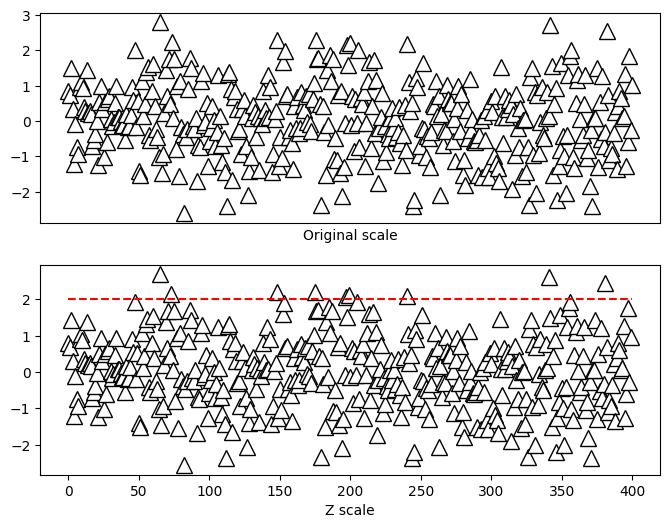

In [27]:
zscorethresh = 2

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data1, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(data1Z, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_xlabel('Z scale')

plt.show()

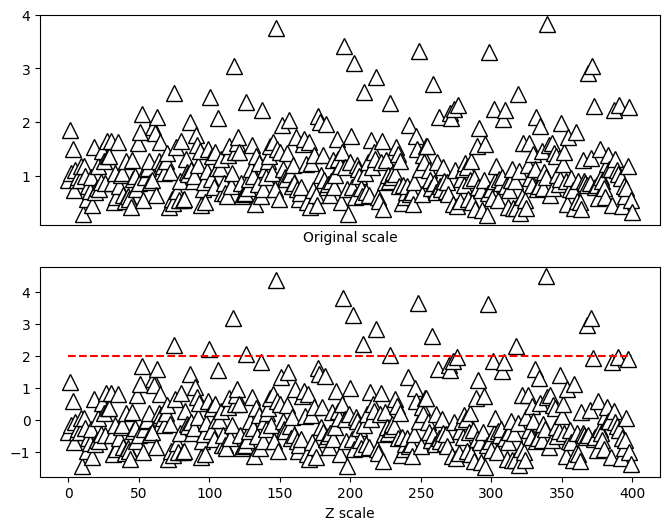

In [28]:
zscorethresh = 2

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data2, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(data2Z, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_xlabel('Z scale')

plt.show()

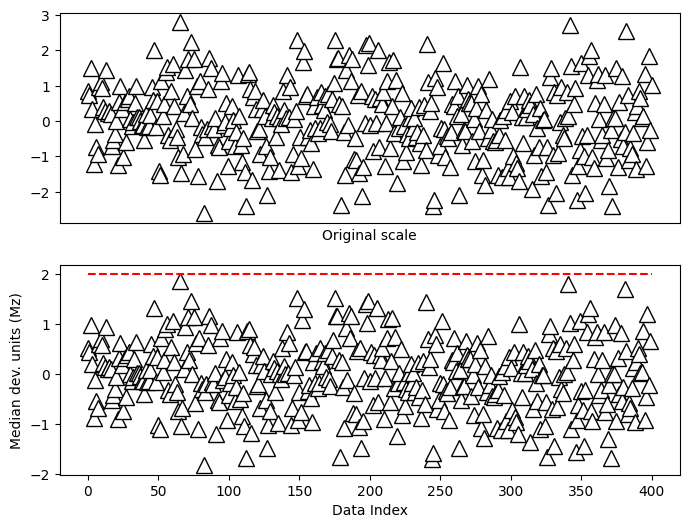

In [30]:
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data1, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(data1Mz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()

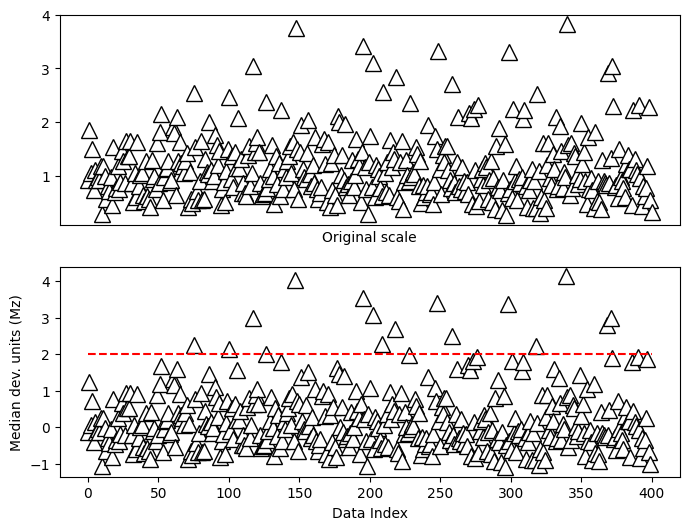

In [31]:
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data2, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(data2Mz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()

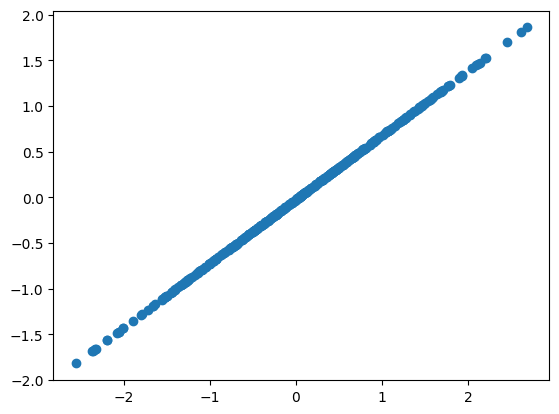

In [32]:
# z vs modified z

plt.plot(data1Z, data1Mz, 'o')
plt.show()

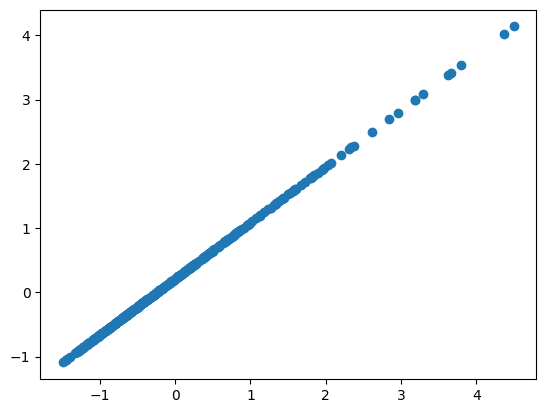

In [33]:
plt.plot(data2Z, data2Mz, 'o')
plt.show()

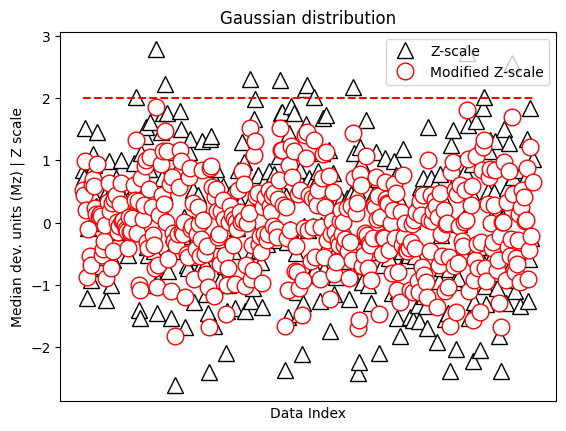

In [46]:
plt.plot(data1, 'k^', label='Z-scale', markerfacecolor='w', markersize=12)
plt.plot(data1Mz, 'ro', label='Modified Z-scale', markerfacecolor='w', markersize=12)
plt.plot([0, N], [zscorethresh, zscorethresh], 'r--')

plt.xticks([])
plt.xlabel('Data Index')
plt.ylabel('Median dev. units (Mz) | Z scale')
plt.title('Gaussian distribution')
plt.legend()

plt.show()

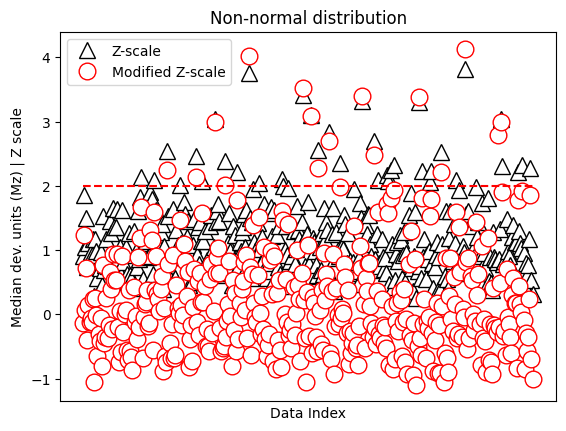

In [47]:
plt.plot(data2, 'k^', label='Z-scale', markerfacecolor='w', markersize=12)
plt.plot(data2Mz, 'ro', label='Modified Z-scale', markerfacecolor='w', markersize=12)
plt.plot([0, N], [zscorethresh, zscorethresh], 'r--')

plt.xticks([])
plt.xlabel('Data Index')
plt.ylabel('Median dev. units (Mz) | Z scale')
plt.title('Non-normal distribution')
plt.legend()

plt.show()

In [38]:
N = 400

rng = np.random.default_rng(12345)

# Create 2 datasets, one normally distributed and the other one right-skewed
data_norm = rng.normal(0, 1, N)
data_nonnorm = rng.normal(0, 1, N)**4

In [39]:
# Compute z-tranformed data
data_normZ = (data_norm - np.mean(data_norm)) / np.std(data_norm, ddof=1)
data_nonnormZ = (data_nonnorm - np.mean(data_nonnorm)) / np.std(data_nonnorm, ddof=1)

# Filter by z-method
# data_nonnormZ = np.where(np.abs(data_nonnormZ) > 3, np.nan, data_nonnormZ)
# print(np.argwhere(np.isnan(data_nonnormZ)))

In [40]:
# Computed Modified z-transformed data
data_norm_mad = robust.mad(data_norm)
data_nonnorm_mad = robust.mad(data_nonnorm)

data_norm_modZ = 0.6745 * (data_norm - np.median(data_norm)) / data_norm_mad
data_nonnorm_modZ = 0.6745 * (data_nonnorm - np.median(data_nonnorm)) / data_nonnorm_mad

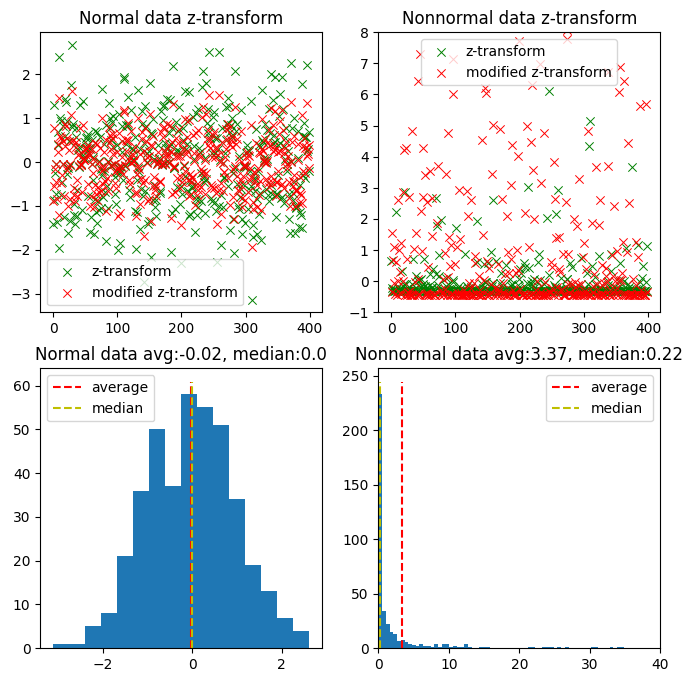

In [41]:
fig, ax = plt.subplots(2, 2)

scatter_size = 0.7

ax[0, 0].scatter(range(N), data_normZ, color="g", marker="x", linewidth=scatter_size, label="z-transform")
ax[0, 0].scatter(range(N), data_norm_modZ, color="r", marker="x", linewidth=scatter_size, label="modified z-transform")
ax[0, 0].set_title("Normal data z-transform")
ax[0, 0].legend()

ax[0, 1].scatter(range(N), data_nonnormZ, color="g", marker="x", linewidth=scatter_size, label="z-transform")
ax[0, 1].scatter(range(N), data_nonnorm_modZ, color="r", marker="x", linewidth=scatter_size, label="modified z-transform")
ax[0, 1].set_ylim([-1, 8])
ax[0, 1].legend()
ax[0, 1].set_title("Nonnormal data z-transform")

norm_median = np.median(data_norm)
norm_avg = np.mean(data_norm)
nonnorm_median = np.median(data_nonnorm)
nonnorm_avg = np.mean(data_nonnorm)

ax[1, 0].hist(data_norm, bins="fd")
min_y_norm = ax[1, 0].get_ylim()
ax[1, 0].plot([norm_avg, norm_avg], min_y_norm, "r--", label="average")
ax[1, 0].plot([norm_median, norm_median], min_y_norm, "y--", label="median")
ax[1, 0].legend()
ax[1, 0].set_title(f"Normal data avg:{norm_avg.round(2)}, median:{norm_median.round(2)}")

ax[1, 1].hist(data_nonnorm, bins="fd")
min_y_nonnorm = ax[1, 1].get_ylim()
ax[1, 1].plot([nonnorm_avg, nonnorm_avg], min_y_nonnorm, "r--", label="average")
ax[1, 1].plot([nonnorm_median, nonnorm_median], min_y_nonnorm, "y--", label="median")
ax[1, 1].plot()
ax[1, 1].legend()
ax[1, 1].set_title(f"Nonnormal data avg:{nonnorm_avg.round(2)}, median:{nonnorm_median.round(2)}")
ax[1, 1].set_xlim([0, 40])


fig.set_size_inches(8, 8)
plt.show()

## Multivariate Z-score

In [61]:
N = 40

d1 = np.exp(-np.abs(np.random.randn(N)*3))
d2 = np.exp(-np.abs(np.random.randn(N)*5))
datamean = np.array([np.mean(d1), np.mean(d2)])

ds = np.zeros(N)
for i in range(N):
  ds[i] = np.linalg.norm(np.array([d1[i], d2[i]]) - datamean)
  # ds[i] = np.sqrt(np.sum(np.array([d1[i], d2[i]]) - datamean)**2)

ds = (ds-np.mean(ds)) / np.std(ds)

Text(0, 0.5, 'Z distance')

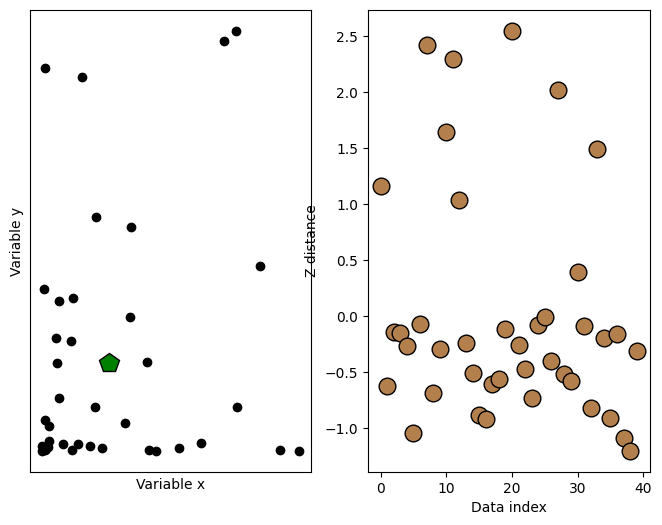

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))

ax[0].plot(d1, d2, 'ko', markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')

ax[0].plot(datamean[0], datamean[1], 'kp', markerfacecolor='g', markersize=15)

ax[1].plot(ds, 'ko', markerfacecolor=[.7, .5, .3], markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

[ 7 11 20 27]


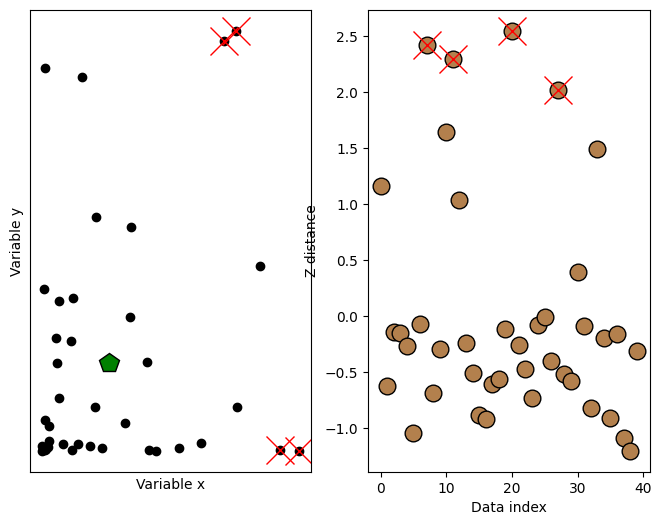

In [63]:
## threshold
distanceThresh = 2

oidx = np.where(ds > distanceThresh)[0]
# in this dataset, large negative z value would mean data is close to mean, so only one tailed test needed here

print(oidx)

ax[1].plot(oidx, ds[oidx], 'x', color='r', markersize=20)
ax[0].plot(d1[oidx], d2[oidx], 'x', color='r', markersize=20)

fig